<a href="https://colab.research.google.com/github/hivischi/Cancer_classification/blob/main/cancer_classificationtree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px

In [ ]:
from google.colab import files
dataset = files.upload()

Saving cancer_classification.csv to cancer_classification (1).csv


In [ ]:
dataset = pd.read_csv("cancer_classification.csv"); dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Il dataset presenta 569 osservazioni e 33 feature.
La variabile oggetto di studio è "diagnosis", la quale presenta due modalità: "M" e "B". Al fine di valutare la correlazione si ricodifica la variabile target assegnando valore 1 alle unità che presentano la modalità "M" e 0 alle altre. Si procede alla verifica di dati mancanti, completamente assenti, ad eccezione della variabile "Unnamed: 32".

In [ ]:
dataset['diagnosis'] = [1 if x=="M" else 0 for x in dataset['diagnosis']]; dataset 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


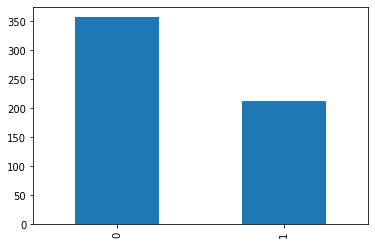

In [ ]:
dataset["diagnosis"].value_counts().plot(kind='bar')

In [ ]:
dataset['diagnosis'].value_counts()
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Si studia la matrice di correlazione tra tutte le variabili presenti nel dataset ai fini della feature selection. Si decide di rimuovere: 
 
*   La variabile "id" poiché irrilevante ai fini dell'analisi e la variabile "Unnamed: 32" in quanto presenta solo valori mancanti;
*   Le variabili relative al perimetro e all'area, in quanto risultano altamente correlate con le variabili riferite al raggio;
*   Le variabili con il suffisso "worst", le quali risultano fortemente correlate con le variabili con il suffisso "mean";
*   Le variabili relative a "concave points" e "compactness" che risultano molto correlate con le variabili relative a "concavity".

Dopo aver effettuato la standardizzazione, al fine di ridurre ulteriormente il numero di feature presenti nel dataset, si ricorre ad una procedura automatica basata sul calcolo della feature importance. Da questa risulta che le variabili "symmetry_mean","fractal_dimension_mean" e"texture_se" sono poco utili per la previsione del target.

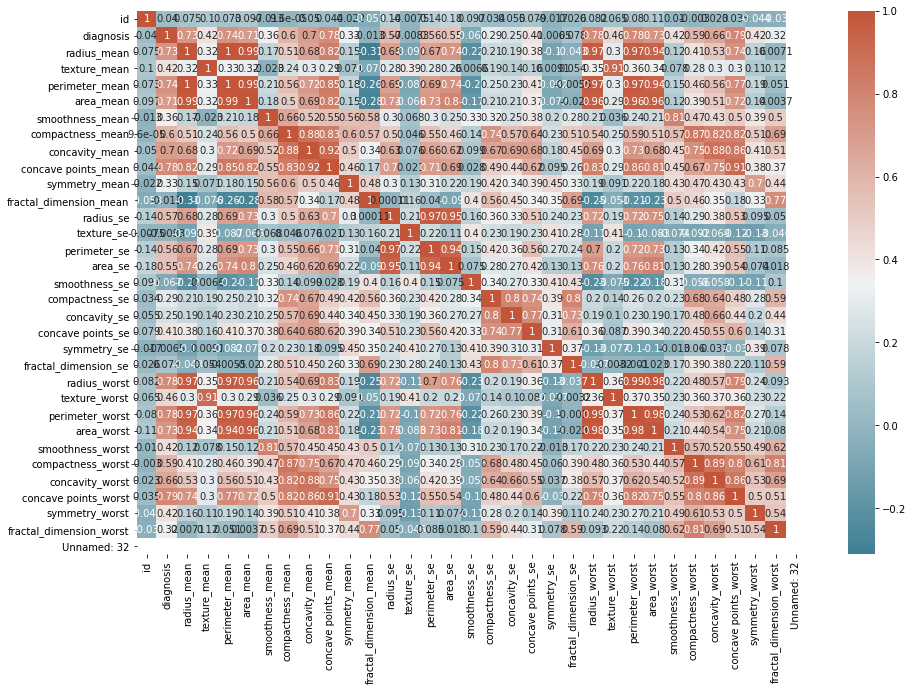

In [ ]:
corr = dataset.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))


In [ ]:
dataset=dataset.drop(["area_mean","perimeter_mean","area_se","perimeter_se","area_worst","perimeter_worst","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst","concave points_mean","concave points_se","compactness_mean","compactness_se","id","Unnamed: 32"],axis=1)

In [ ]:
dataset

,diagnosis,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.05198,0.01114,0.004239
565,1,20.13,28.25,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.03950,0.01898,0.002498
566,1,16.60,28.08,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.04730,0.01318,0.003892
567,1,20.60,29.33,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.07117,0.02324,0.006185


In [ ]:
X = dataset.drop(['diagnosis'], axis=1); X


,radius_mean,texture_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se
0,17.99,10.38,0.11840,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.05373,0.03003,0.006193
1,20.57,17.77,0.08474,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01860,0.01389,0.003532
2,19.69,21.25,0.10960,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.03832,0.02250,0.004571
3,11.42,20.38,0.14250,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.05661,0.05963,0.009208
4,20.29,14.34,0.10030,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.05688,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.05198,0.01114,0.004239
565,20.13,28.25,0.09780,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.03950,0.01898,0.002498
566,16.60,28.08,0.08455,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.04730,0.01318,0.003892
567,20.60,29.33,0.11780,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.07117,0.02324,0.006185


In [ ]:
Y = dataset['diagnosis']; Y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
X_standard = StandardScaler().fit_transform(X); X_standard

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  0.72402616,
         1.14875667,  0.90708308],
       [ 1.82982061, -0.35363241, -0.82696245, ..., -0.44078006,
        -0.80545038, -0.09944374],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  0.21307643,
         0.23703554,  0.2935594 ],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.5108265 ,
        -0.89141612,  0.03672674],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  1.30228464,
         0.32663363,  0.90405707],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.05750068,
         0.75282996, -0.382754  ]])

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot

Feature: 0, Score: 0.59730
Feature: 1, Score: 0.03445
Feature: 2, Score: 0.03870
Feature: 3, Score: 0.13820
Feature: 4, Score: 0.01243
Feature: 5, Score: 0.00573
Feature: 6, Score: 0.03197
Feature: 7, Score: 0.01186
Feature: 8, Score: 0.01825
Feature: 9, Score: 0.05970
Feature: 10, Score: 0.01914
Feature: 11, Score: 0.03227


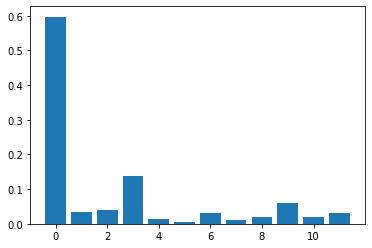

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_imp = DecisionTreeClassifier(random_state=12345)
model_imp.fit(X_standard,Y)
importance = model_imp.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
X_standard=pd.DataFrame(X_standard);X_standard
X_standard=X_standard.drop([4,5,7],axis=1)

Si procede con lo split del dataset in training set e test set, utilizzando percentuali rispettivamente del 70% e del 30%.

In [ ]:
from  sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_standard, Y, test_size=0.3, random_state= 22)

Al fine di identificare i migliori iperparametri per il decision tree, si ricorre alla GridSearchCV che, basandosi su range di parametri arbitrariamente proposti, fornisce in output la combinazione di valori associata alla migliore performance. Si utilizzano, in seguito, questi parametri per la costruzione del modello.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
class_tree=DecisionTreeClassifier(random_state=22)
param = {'max_depth':range(1, 6), 'min_samples_split':range(10,20), 'min_samples_leaf':range(2,15)} 
grid = GridSearchCV(class_tree, param, cv=5)
grid.fit(X_train, Y_train)
print(grid.best_params_)

{'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 10}


Il decision tree è stato rappresentato sia in forma grafica che in forma testuale ed è associato ad una buona performance. Infatti, l'albero di decisione offre 8 nodi terminali, i quali presentano una bassa impurità (ad eccezione di una sola foglia).
Si valutano, inoltre, le metriche di valutazione della performance sia sul training set che sul test set, facendo particolare riferimento all'F1-score, in quanto le modalità della classe non sono bilanciate. Tali valori sono simili sui due set di dati e sufficientemente elevati, indicando una buona performance e l'assenza di overfitting.

In [ ]:
from sklearn import tree
mod_tree=DecisionTreeClassifier(max_depth=3,min_samples_split=10,min_samples_leaf=6,random_state=22)
mod_tree.fit(X_train, Y_train)
text_representation = tree.export_text(mod_tree)
print(text_representation)

|--- feature_0 <= 0.26
|   |--- feature_3 <= 0.19
|   |   |--- feature_4 <= 0.17
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.17
|   |   |   |--- class: 0
|   |--- feature_3 >  0.19
|   |   |--- feature_6 <= 1.61
|   |   |   |--- class: 1
|   |   |--- feature_6 >  1.61
|   |   |   |--- class: 0
|--- feature_0 >  0.26
|   |--- feature_1 <= -0.67
|   |   |--- feature_3 <= 0.35
|   |   |   |--- class: 0
|   |   |--- feature_3 >  0.35
|   |   |   |--- class: 1
|   |--- feature_1 >  -0.67
|   |   |--- feature_5 <= -1.05
|   |   |   |--- class: 1
|   |   |--- feature_5 >  -1.05
|   |   |   |--- class: 1



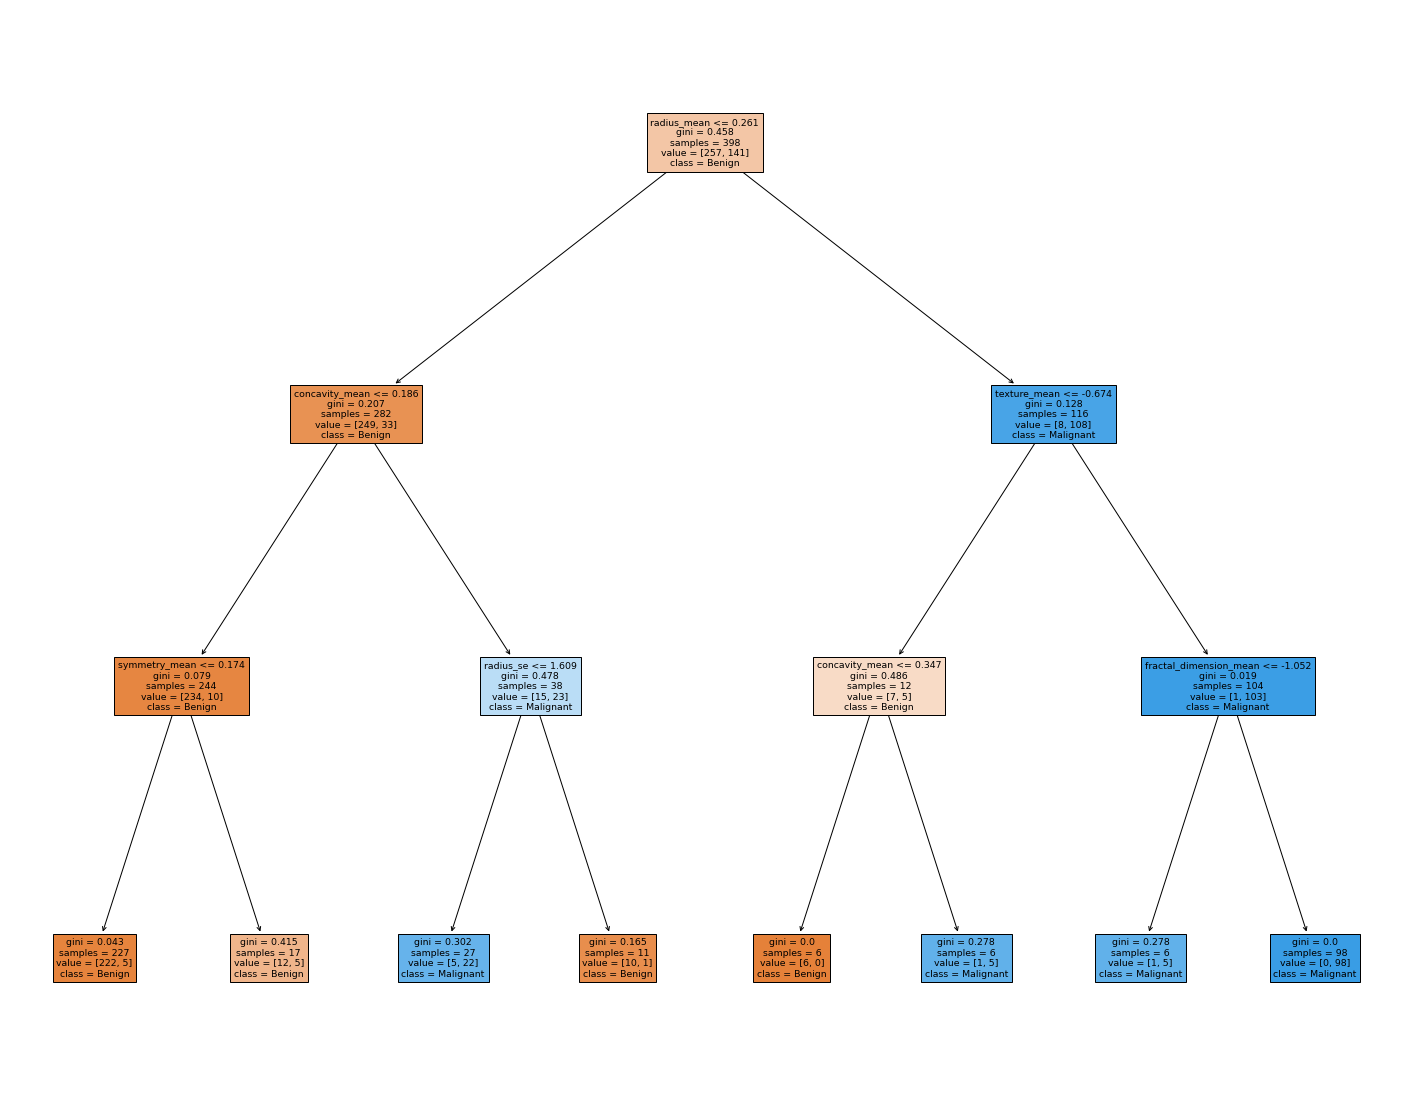

In [ ]:
fig1 = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod_tree,feature_names=list(X.columns), class_names=['Benign', 'Malignant'],filled=True)

In [ ]:
mod_tree.fit(X_train, Y_train)#Test set
y_pred = mod_tree.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       100
           1       0.93      0.90      0.91        71

    accuracy                           0.93       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171



In [ ]:
y_train_pred = mod_tree.predict(X_train)
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       257
           1       0.95      0.92      0.94       141

    accuracy                           0.95       398
   macro avg       0.95      0.95      0.95       398
weighted avg       0.95      0.95      0.95       398



Si è deciso di utilizzare i dati a disposizione per implementare il SVM. Facendo ricorso all'algoritmo GridSearch CV si è individuata la miglior configurazione per gli iperparametri C e kernel function, i quali hanno restituito un modello con una buona capacità di classificazione sia sul training set che sul test set.

In [ ]:
from sklearn import svm
parameters = {'kernel':('linear', 'rbf',"poly","sigmoid"), 'C':range(1, 10)}
svc = svm.SVC(random_state=22)
grid_svm = GridSearchCV(svc, parameters,cv=5)
grid_svm.fit(X_train, Y_train)
print(grid_svm.best_params_)

{'C': 1, 'kernel': 'rbf'}


In [ ]:
Support_class = svm.SVC(C=1,kernel="rbf",random_state=22)
Support_class.fit(X_train, Y_train)

In [ ]:
y_train_pred = Support_class.predict(X_train)
print(classification_report(Y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       257
           1       0.99      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.98       398
weighted avg       0.98      0.98      0.98       398



In [ ]:

y_pred = Support_class.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       100
           1       0.98      0.85      0.91        71

    accuracy                           0.93       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.93      0.93      0.93       171



Per avere una rappresentazione grafica della classificazione ottenuta tramite SVM, si è effettuata una PCA con 2 componenti principali, le quali spiegano circa il 50% della varianza totale. Sebbene questo risultato non sia particolarmente soddisfacente, si procede comunque nell'implementazione del SVM sul dataset di dimensionalità ridotta. Le metriche di valutazione della classificazione risultano buone sia sul training set sia sul test set.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_svm=pca.fit_transform(X_standard);pca_svm
print(pca.explained_variance_ratio_)

[0.38008115 0.21577985]


In [ ]:
pca_svm=pd.DataFrame(pca_svm);pca_svm

,0,1
0,3.546929,-0.290283
1,-0.138245,-1.794369
2,2.153300,-1.409283
3,4.209377,3.126966
4,2.308662,-0.355634
...,...,...
564,3.394936,-2.130708
565,1.530246,-2.392979
566,0.338352,-1.514441
567,4.364963,-1.914122


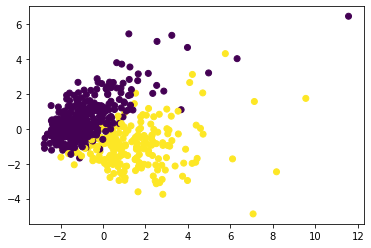

In [ ]:
plt.scatter(pca_svm[0],pca_svm[1],c=Y)

In [ ]:
X_PCA_train,X_PCA_test=train_test_split(pca_svm,test_size=0.3,random_state=22)

In [ ]:
parameters1 = {'kernel':('linear', 'rbf',"poly","sigmoid"), 'C':range(1, 10)}
svc1 = svm.SVC(random_state=22)
grid_svm1= GridSearchCV(svc1, parameters,cv=5)
grid_svm1.fit(X_PCA_train, Y_train)
print(grid_svm1.best_params_)

{'C': 2, 'kernel': 'rbf'}


In [ ]:
Support_class1= svm.SVC(C=2,kernel="rbf",random_state=22)
Support_class1.fit(X_PCA_train, Y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=22, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
y_train_pred1= Support_class1.predict(X_PCA_train)
print(classification_report(Y_train, y_train_pred1))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       257
           1       0.94      0.90      0.92       141

    accuracy                           0.94       398
   macro avg       0.94      0.93      0.94       398
weighted avg       0.94      0.94      0.94       398



In [ ]:
y_pred1= Support_class1.predict(X_PCA_test)
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       100
           1       0.98      0.83      0.90        71

    accuracy                           0.92       171
   macro avg       0.94      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
support_vectors = Support_class1.support_vectors_

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



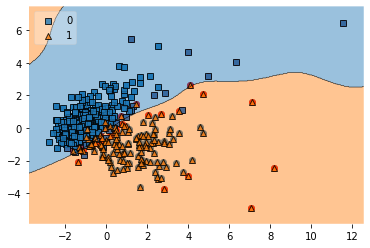

In [ ]:
plt.scatter(X_PCA_train[0], X_PCA_train[1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(np.array(X_PCA_train), np.array(Y_train), clf=Support_class1, legend=2)
plt.show()